In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Example 1 in Mall paper with alpha=0.5



In [2]:
N = nn.Sequential(nn.Linear(1, 5), nn.Sigmoid(), nn.Linear(5,1, bias=False))


Psi_t = lambda x: x * N(x)  
f = lambda x, Psi: x

### We use formula 20 in the paper

In [3]:
phi_prime = lambda x: torch.exp(-x)/torch.pow((1+torch.exp(-x)),2)

In [4]:
alph = 0.5

def loss(x):
    
    outputs = Psi_t(x) 
    
    wj = N[0].weight.T[0]
    uj = N[0].bias
    vj = N[2].weight[0]
    
    D_alpha_N = 0
    for j in range(len(wj)):
        D_alpha_N += wj[j]*vj[j]*x**(1-alph)*phi_prime(wj[j]*x+uj[j])
    
    D_alph_y_n = x**(1-alph)*N(x) + D_alpha_N*x          # Vector tensor + scalar tensor = Vector tensor
    
    final_loss = torch.mean((D_alph_y_n - f(x, outputs))**2)
    
    print('loss is', final_loss)

    return final_loss

In [5]:
x_train = np.linspace(0, 1, 10)[:, None]
x = torch.Tensor(x_train)
x.requires_grad = True

In [6]:
optimizer = torch.optim.LBFGS(N.parameters())

def closure():

    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    
    return l

In [7]:
# Here train the neural network
for i in range(10):
    optimizer.step(closure)

loss is tensor(0.2098, grad_fn=<MeanBackward0>)
loss is tensor(0.0153, grad_fn=<MeanBackward0>)
loss is tensor(0.0013, grad_fn=<MeanBackward0>)
loss is tensor(0.0012, grad_fn=<MeanBackward0>)
loss is tensor(0.0012, grad_fn=<MeanBackward0>)
loss is tensor(0.0009, grad_fn=<MeanBackward0>)
loss is tensor(0.0005, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(8.5105e-05, grad_fn=<Mean

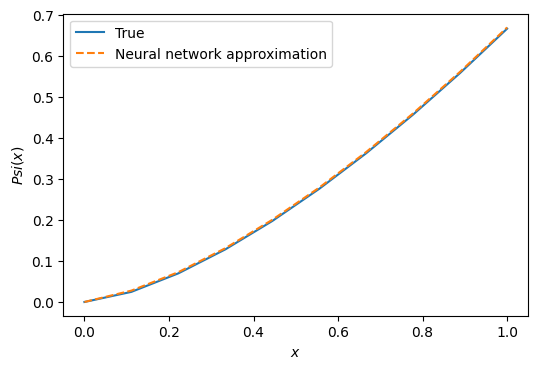

In [8]:
with torch.no_grad():
    yy = Psi_t(torch.Tensor(x_train)).numpy()  
yt = 2/3*x_train**(3/2)


fig, ax = plt.subplots(dpi=100)
ax.plot(x_train, yt, label='True')
ax.plot(x_train, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');

# Other Examples? 2 and 3?